## Lets take a run ot our model and see how it performs. We will set a indicator for the daily returns for SPY between 7.2% and 11%, which is rear but does happen in the mist of economic crisis. This is a perfect time to look that the 08 crash as well as the current COViD-19 epidemic

## Libraries 

In [2]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

## import data
## We will be looking at the adjustable close for both the S&P and VIX

In [4]:
tickers = ["^VIX", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2006-1-1")["Adj Close"]

### plotting visual movement for both VIX and SPY .As expected the plots show an inverse correlation

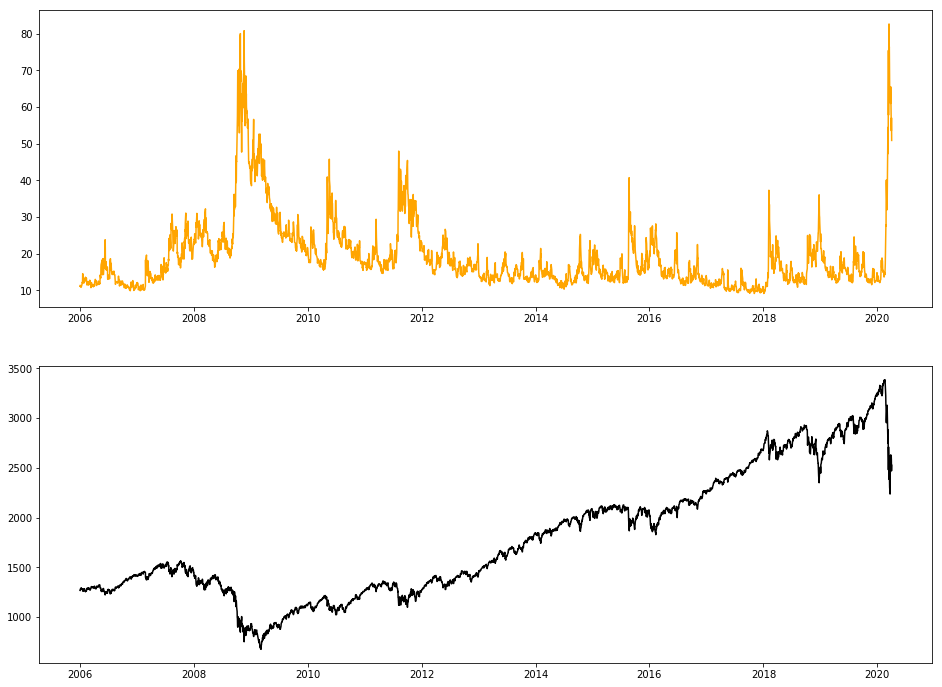

In [15]:
fig, axes = plt.subplots(2,1,figsize = (16,12))
axes[0].plot(data["^VIX"], c = "orange")
axes[1].plot(data["^GSPC"], c = "black")

### Tracking thre daily returns for each security. We will look at the volitility of the daily returns on a histogram below. what we see is most of the daily returns of SPY between -0.05, and 0.05, where VIX is between -0.2, and .2 with a few outlyers

In [16]:
for t in tickers:
    data[f"{t} daily returns"] = data[f"{t}"].pct_change()

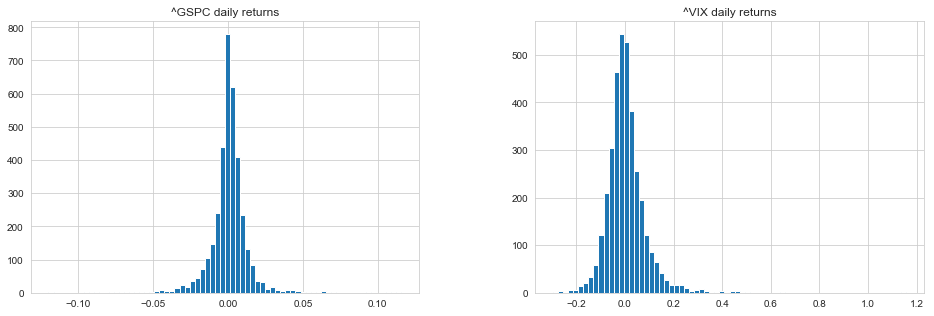

In [23]:
sns.set_style("whitegrid")
data[["^VIX daily returns","^GSPC daily returns"]].hist(figsize = (16,5), bins = 70);

### The reason for this analysis is the test the theory that as the daily returns of SPY is between 7% and 11%  we can see a sharp increase in VIX. We will test this below but first we will creat a hypithetical portfolio containing both SPY and VIX . We will weigh the portfolio 40% SPY and 60% VIX with a position of 150K in the portfolio. Our other assumption is that we are getting in the market on the first date of 1-3-2006

## Normal Returns

In [25]:
for s in tickers:
    data[f"{s} normal returns"] = data[s]/data[s].iloc[0]

In [27]:
data.head()

,^VIX,^GSPC,^VIX daily returns,^GSPC daily returns,^VIX normal returns,^GSPC normal returns
Date,,,,,,
2006-01-03,11.14,1268.800049,NaN,NaN,1.000000,1.000000
2006-01-04,11.37,1273.459961,0.020646,0.003673,1.020646,1.003673
2006-01-05,11.31,1273.479980,-0.005277,0.000016,1.015260,1.003688
2006-01-06,11.00,1285.449951,-0.027409,0.009399,0.987433,1.013123
2006-01-09,11.13,1290.150024,0.011818,0.003656,0.999102,1.016827


## Allocations

In [28]:
weights = [0.4, 0.6]
for s,w in zip(tickers, weights):
    data[f"{s} allocation"] = data[f"{s} normal returns"] * w

In [30]:
data.head()

,^VIX,^GSPC,^VIX daily returns,^GSPC daily returns,^VIX normal returns,^GSPC normal returns,^VIX allocation,^GSPC allocation
Date,,,,,,,,
2006-01-03,11.14,1268.800049,NaN,NaN,1.000000,1.000000,0.400000,0.600000
2006-01-04,11.37,1273.459961,0.020646,0.003673,1.020646,1.003673,0.408259,0.602204
2006-01-05,11.31,1273.479980,-0.005277,0.000016,1.015260,1.003688,0.406104,0.602213
2006-01-06,11.00,1285.449951,-0.027409,0.009399,0.987433,1.013123,0.394973,0.607874
2006-01-09,11.13,1290.150024,0.011818,0.003656,0.999102,1.016827,0.399641,0.610096


## Position -> 150K

In [31]:
for x in tickers:
    data[f"{x} position"] = data[f"{x} allocation"] * 150000

In [33]:
data.head()

,^VIX,^GSPC,^VIX daily returns,^GSPC daily returns,^VIX normal returns,^GSPC normal returns,^VIX allocation,^GSPC allocation,^VIX position,^GSPC position
Date,,,,,,,,,,
2006-01-03,11.14,1268.800049,NaN,NaN,1.000000,1.000000,0.400000,0.600000,60000.000000,90000.000000
2006-01-04,11.37,1273.459961,0.020646,0.003673,1.020646,1.003673,0.408259,0.602204,61238.776670,90330.542303
2006-01-05,11.31,1273.479980,-0.005277,0.000016,1.015260,1.003688,0.406104,0.602213,60915.619772,90331.962351
2006-01-06,11.00,1285.449951,-0.027409,0.009399,0.987433,1.013123,0.394973,0.607874,59245.958677,91181.030228
2006-01-09,11.13,1290.150024,0.011818,0.003656,0.999102,1.016827,0.399641,0.610096,59946.138805,91514.421287


## Lets take a run ot our model and see how it performs. We will set a indicator for the daily returns for SPY and 7.2%, which is rear but does happen in the mist of economic crisis. THis is a perfect time to look that the 08 crash as well as the curren COViD-19 epidemic

### We can see there are 4 dates that this occurred and we just missed 2. in 2020

In [50]:
data[data["^GSPC daily returns"] * 100 > 7.2]["^VIX"]

Date
2008-10-13    54.990002
2008-10-28    66.959999
2020-03-13    57.830002
2020-03-24    61.669998
Name: ^VIX, dtype: float64

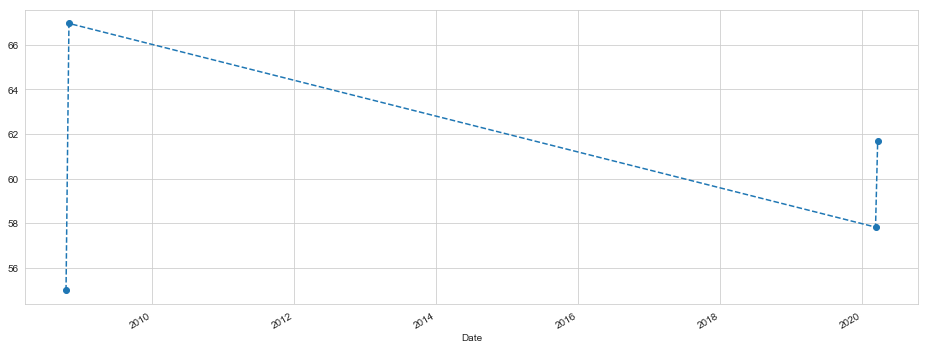

In [57]:
data[data["^GSPC daily returns"] * 100 > 7.2]["^VIX"].plot(figsize = (16,6), marker = "o", ls = "--")

## lets take a look at each date where SpY was 7.2 or above. To get a better look at this we will take a few days before and after  the set date

## 2008-10-13

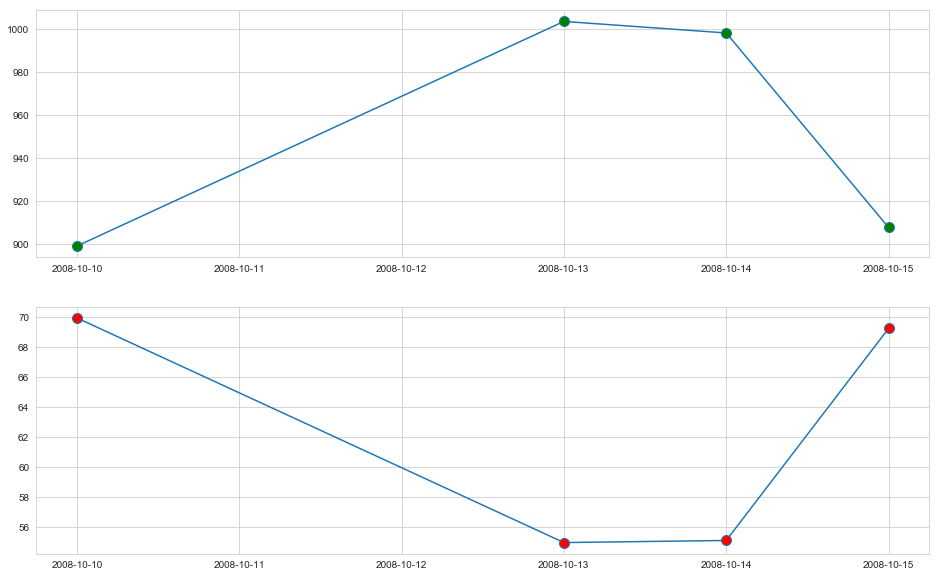

In [78]:
fig, axes = plt.subplots(2,1, figsize = (16,10))
axes[0].plot(data.loc["2008-10-10":"2008-10-15"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-10":"2008-10-15"]["^VIX"], marker = "o", mfc = "r", ms = 10)



### 2008-10-28

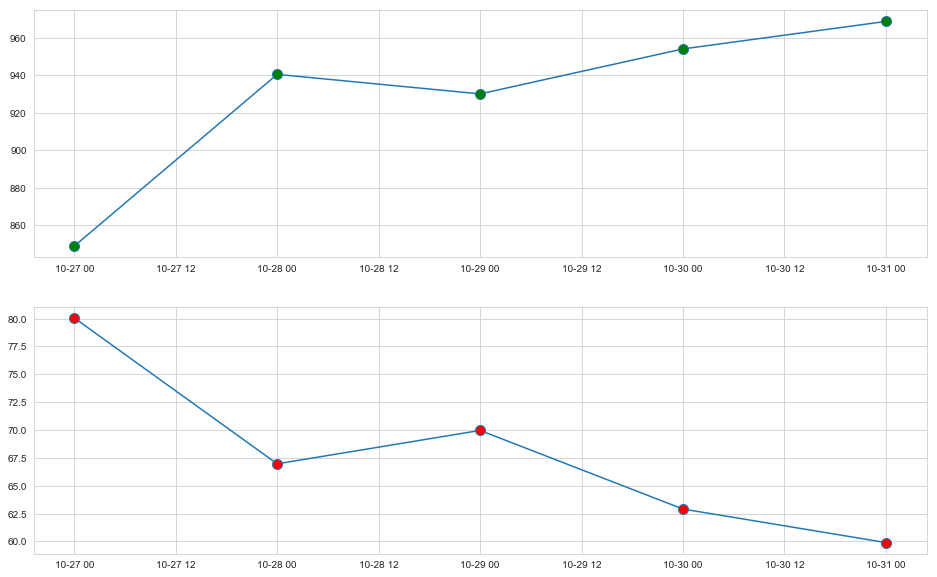

In [83]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-25":"2008-10-31"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-25":"2008-10-31"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2020-03-13

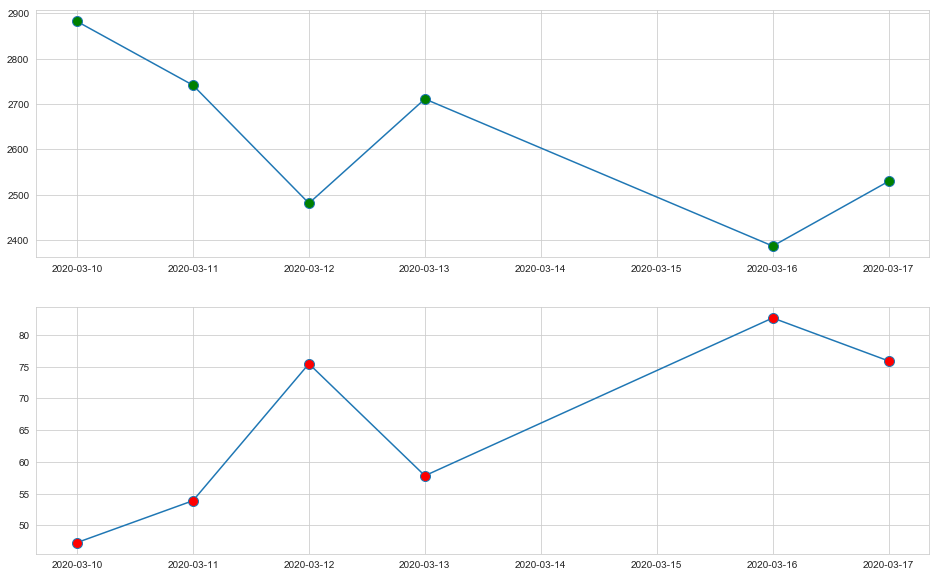

In [86]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-10":"2020-03-17"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-10":"2020-03-17"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2020-03-24


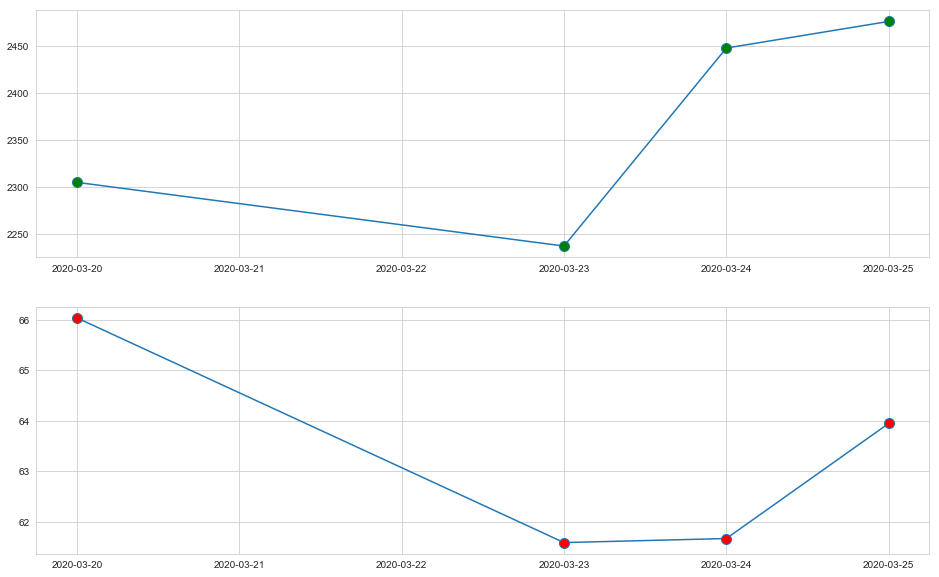

In [89]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-20":"2020-03-25"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-20":"2020-03-25"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## in summary ad SPY daily returns is in the range of 7.2 and 11 it is almost certain that VIX will have a significant gain. We cna see this clearly in 2020 on the days of 3/13 and 3 /24